In [1]:
%pylab inline
from scipy.optimize import curve_fit


Populating the interactive namespace from numpy and matplotlib


In [2]:
%pylab inline
def g(x,a,m,s):
    return a*exp(-(x-m)**2/(2*(s)**2))
def G(x, a, m, s,b,c,d):
    return a*exp(-(x-m)**2/(2*(s)**2))+b*x**2+c*x+d #modified gaussian distribution
def C(y,z):
    return sum((y-z)**2/z)
def L(x,m,b):
    return m*x+b
def S(x,a,b):
    return a+b*x**2

Populating the interactive namespace from numpy and matplotlib


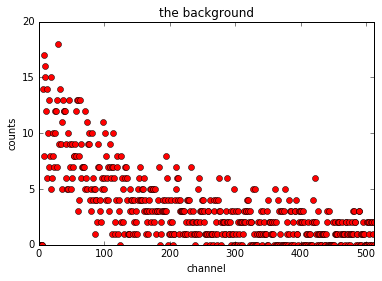

In [3]:
arr=genfromtxt("background.txt")
arr=arr.astype(int)
x=arr[:,0]
y=arr[:,1]
plt.plot(x,y,'ro' )
plt.xlabel('channel')
plt.ylabel('counts')
plt.axis([0,512,0,20])
plt.title('the background')

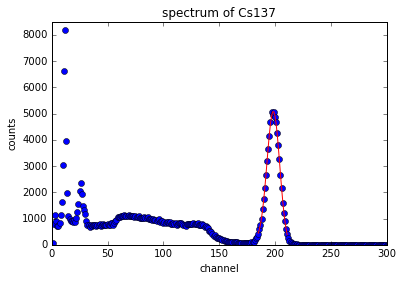

In [4]:
arr=genfromtxt("Cs137 2d.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
plt.plot(x, y, 'bo')
plt.title('spectrum of Cs137')
plt.xlabel('channel')
plt.ylabel('counts')
plt.axis([0,300,0,8500])
arr=genfromtxt("Cs137 peak.txt")

arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]

mean= sum(x*y)/sum(y)

std=(sum(y*(x-mean)**2)/sum(y))**0.5



a=amax(y)


para, unc = curve_fit(G, x, y, p0=[a,mean,std,0,-20,0],maxfev=1000000000)
z=array(G(x, *para))
plt.plot(x, z, 'r-', label='fit')



total channel number is: 27
the mean value is: 198
standard deviation is: 5.38516480713
the highest observation: 5054
the expectation value is: 198.63 +/- 0.05
standard deviatition of gaussain is: 5.73 +/- 0.29
chisquare is : 20.5988428416
0.0274894359427
-20.4992644293
2991.20720331
the gaussian expectation value is: 198.48 +/- 0.04
gaussian standard deviatition of gaussain is: 5.75 +/- 0.04
the gaussian chisquare is : 104.5


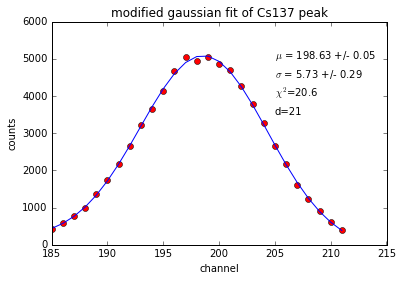

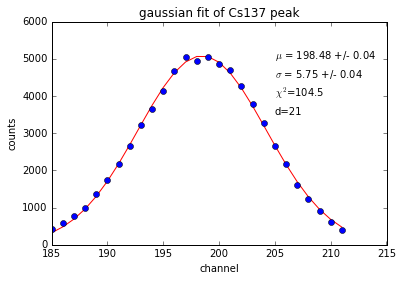

In [5]:
arr=genfromtxt("Cs137 peak.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
print 'total channel number is:',len(x)
mean= sum(x*y)/sum(y)
print 'the mean value is:',mean
std=(sum(y*(x-mean)**2)/sum(y))**0.5
print 'standard deviation is:',std


a=amax(y)
print 'the highest observation:',a

para, unc = curve_fit(G, x, y, p0=[a,mean,std,0,-20,0],maxfev=1000000000)
z=array(G(x, *para))
plt.plot(x,y,'ro')
plt.plot(x, z, 'b-')
plt.title('modified gaussian fit of Cs137 peak')
plt.xlabel('channel')
plt.ylabel('counts')
chiCs=C(y,z)
dCs=len(x)

print 'the expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc)[1]),2)
print 'standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc)[2]),2)
print 'chisquare is :',chiCs
print para[3]
print para[4]
print para[5]
Cs=round(para[1],2)

Csu=round(sqrt(diag(unc)[1]),2)
plt.text(205, 5000, r'$\mu$ = %s +/- %s' % (round(para[1],2), round(sqrt(diag(unc)[1]),2)))
plt.text(205,4500,r'$\sigma$ = %s +/- %s'%(round(para[2],2),round(sqrt(diag(unc)[2]),2)))
plt.text(205,4000,r'$\chi^2$=%s' %round(chiCs,2))
plt.text(205,3500,'d=%s'%(len(x)-6))

figure(2)
para, unc = curve_fit(g, x, y, p0=[a,mean,std],maxfev=1000000000)
z=array(g(x, *para))
plt.plot(x, z, 'r-', label='fit')
plt.plot(x,y,'bo')
plt.xlabel('channel')
plt.ylabel('counts')
plt.title('gaussian fit of Cs137 peak')
chigCs=round(C(y,z),2)
print 'the gaussian expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc)[1]),2)
print 'gaussian standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc)[2]),2)
print 'the gaussian chisquare is :',chigCs

plt.text(205, 5000, r'$\mu$ = %s +/- %s' % (round(para[1],2), round(sqrt(diag(unc)[1]),2)))
plt.text(205,4500,r'$\sigma$ = %s +/- %s'%(round(para[2],2),round(sqrt(diag(unc)[2]),2)))
plt.text(205,4000,r'$\chi^2$=%s' %round(chigCs,2))
plt.text(205,3500,'d=%s'%(len(x)-6))

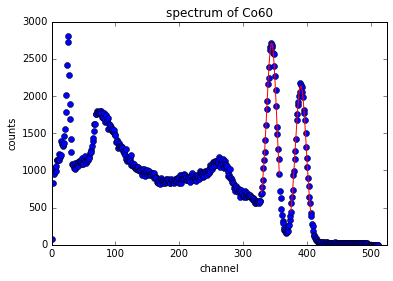

In [6]:
arr=genfromtxt("Co60 2d.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
plt.plot(x, y, 'bo')
plt.title('spectrum of Co60')
plt.xlabel('channel')
plt.ylabel('counts')
plt.axis([0,525,0,3000])
arr=genfromtxt("Co60 peak1.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]


mean= sum(x*y)/sum(y)

std=(sum(y*(x-mean)**2)/sum(y))**0.5


a=amax(y)


para, unc = curve_fit(G, x, y, p0=[a,mean,std,-0.9,637.34,-10780],maxfev=1000000000)
z=array(G(x, *para))

plt.plot(x, z, 'r-', label='fit') 

arr=genfromtxt("Co60 peak2.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]

mean= sum(x*y)/sum(y)

std=(sum(y*(x-mean)**2)/sum(y))**0.5


a=amax(y)


para, unc = curve_fit(G, x, y, p0=[a,mean,std,3,4,200],maxfev=10000000)
z=array(G(x, *para))
plt.plot(x, z, 'r-', label='fit') 
plt.title('spectrum of Co60')
plt.xlabel('channel')
plt.ylabel('counts')



total channel number is: 29
the mean value is: 343
the standard deviation is: 7.0
the highest observation: 2713
the expectation value is: 345.08 +/- 0.17
standard deviatition of gaussain is: 7.45 +/- 0.98
chisquare is : 21.3700712783
-0.935476681228
637.137369918
-107871.028492
the gaussian expectation value is: 344.59 +/- 0.09
gaussian standard deviatition of gaussain is: 8.79 +/- 0.11
the gaussian chisquare is : 100.79


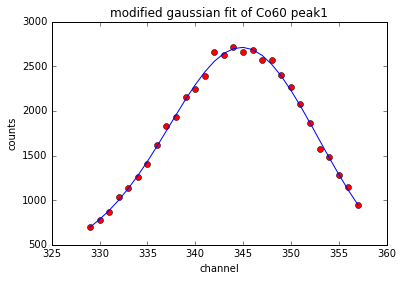

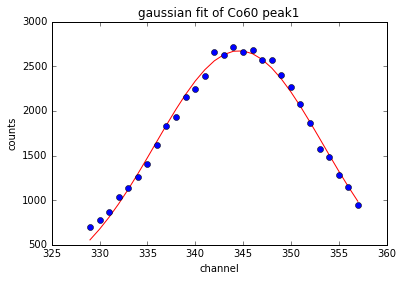

In [7]:
arr=genfromtxt("Co60 peak1.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
print 'total channel number is:',len(x)

mean= sum(x*y)/sum(y)
print 'the mean value is:',mean
std=(sum(y*(x-mean)**2)/sum(y))**0.5
print 'the standard deviation is:',std

a=amax(y)
print 'the highest observation:',a

para, unc = curve_fit(G, x, y, p0=[a,mean,std,-0.9,637.34,-10780],maxfev=1000000000)
z=array(G(x, *para))
plt.plot(x,y,'ro')
plt.plot(x, z, 'b-', label='fit') 
plt.title('modified gaussian fit of Co60 peak1')
plt.xlabel('channel')
plt.ylabel('counts')
dCo1=len(x)
chiCo1=C(y,z)
print 'the expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc)[1]),2)
print 'standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc)[2]),2)
Co1=round(para[1],2)

Co1u=round(sqrt(diag(unc)[1]),2)

print 'chisquare is :',chiCo1
print para[3]
print para[4]
print para[5]

figure(2)
para, unc = curve_fit(g, x, y, p0=[a,mean,std],maxfev=1000000000)
z=array(g(x, *para))
plt.plot(x, z, 'r-', label='fit')
plt.plot(x,y,'bo')
plt.xlabel('channel')
plt.ylabel('counts')
plt.title('gaussian fit of Co60 peak1')
chigCo1=round(C(y,z),2)
print 'the gaussian expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc)[1]),2)
print 'gaussian standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc)[2]),2)
print 'the gaussian chisquare is :',chigCo1

total channel number is: 32
the mean value is: 390
the standard deviation is: 7.34846922835
the highest observation: 2169
the expectation value is: 390.68 +/- 0.13
standard deviatition of gaussain is: 8.53 +/- 1.71
chisquare is : 22.7183270785
-0.150846315459
116.640516519
-22454.4901961
the gaussian expectation value is: 390.59 +/- 0.05
gaussian standard deviatition of gaussain is: 8.73 +/- 0.06
the gaussian chisquare is : 24.43


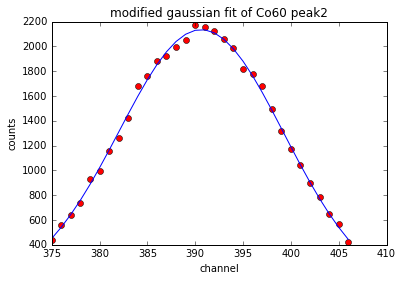

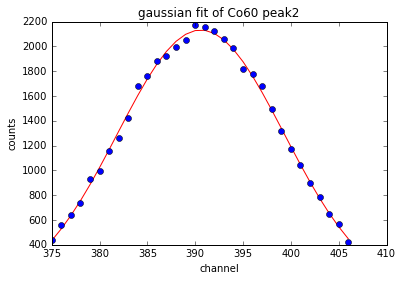

In [8]:

arr=genfromtxt("Co60 peak2.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
print 'total channel number is:',len(x)
mean= sum(x*y)/sum(y)
print 'the mean value is:',mean
std=(sum(y*(x-mean)**2)/sum(y))**0.5
print 'the standard deviation is:',std

a=amax(y)
print 'the highest observation:',a

para, unc = curve_fit(G, x, y, p0=[a,mean,std,3,4,200],maxfev=10000000)
z=array(G(x, *para))
plt.plot(x,y,'ro')
plt.plot(x, z, 'b-', label='fit') 
plt.title('modified gaussian fit of Co60 peak2')
plt.xlabel('channel')
plt.ylabel('counts')
dCo2=len(x)
chiCo2=C(y,z)
print 'the expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc)[1]),2)
print 'standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc)[2]),2)
print 'chisquare is :',chiCo2
print para[3]
print para[4]
print para[5]

Co2=round(para[1],2)

Co2u=round(sqrt(diag(unc)[1]),2)

figure(2)
para, unc = curve_fit(g, x, y, p0=[a,mean,std],maxfev=1000000000)
z=array(g(x, *para))
plt.plot(x, z, 'r-', label='fit')
plt.plot(x,y,'bo')
plt.xlabel('channel')
plt.ylabel('counts')
plt.title('gaussian fit of Co60 peak2')
chigCo2=round(C(y,z),2)
print 'the gaussian expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc)[1]),2)
print 'gaussian standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc)[2]),2)
print 'the gaussian chisquare is :',chigCo2
Cog2=round(para[1],2)

Cog2u=round(sqrt(diag(unc)[1]),2)

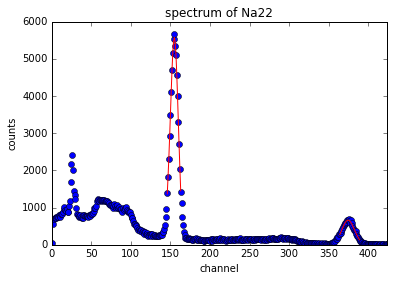

In [9]:
arr=genfromtxt("na22 2d.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
plt.plot(x, y, 'bo')
plt.title('spectrum of Na22')
plt.xlabel('channel')
plt.ylabel('counts')
plt.axis([0,423,0,6000])
arr=genfromtxt("na22 peak1.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]

mean= sum(x*y)/sum(y)

std=(sum(y*(x-mean)**2)/sum(y))**0.5


a=amax(y)


para, unc = curve_fit(G, x, y, p0=[a,mean,std,-15.56,4799.339,-367931.35],maxfev=100000000)
z=array(G(x, *para))

plt.plot(x, z, 'r-', label='fit')

arr=genfromtxt("na22 peak2 .txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]

mean= sum(x*y)/sum(y)

std=(sum(y*(x-mean)**2)/sum(y))**0.5


a=amax(y)


para, unc = curve_fit(G, x, y, p0=[a,mean,std,-0.63,472,-87882],maxfev=100000000)
z=array(G(x, *para))

plt.plot(x, z, 'r-', label='fit')

total channel number is: 18
the mean value is: 154
the standard deviation is: 4.24264068712
the highest observation: 5663
the expectation value is: 155.06 +/- 0.06
standard deviatition of gaussain is: 4.21 +/- 0.5
chisquare is : 7.9116610984
-15.5617655059
4798.79019514
-367889.009654
the gaussian expectation value is: 154.81 +/- 0.04
gaussian standard deviatition of gaussain is: 5.12 +/- 0.04
the gaussian chisquare is : 40.76


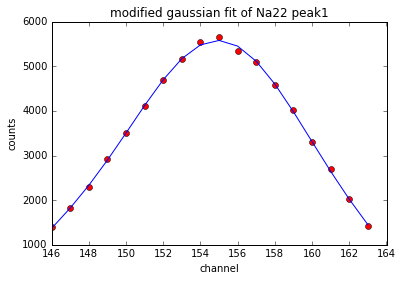

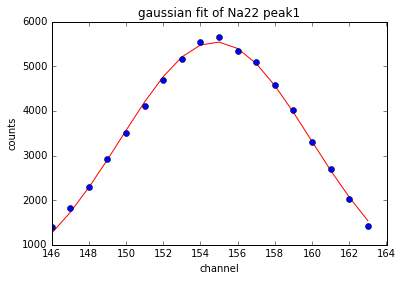

In [10]:
arr=genfromtxt("na22 peak1.txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
print 'total channel number is:',len(x)
mean= sum(x*y)/sum(y)
print 'the mean value is:',mean
std=(sum(y*(x-mean)**2)/sum(y))**0.5
print 'the standard deviation is:',std

a=amax(y)
print 'the highest observation:',a

para, unc = curve_fit(G, x, y, p0=[a,mean,std,-15.56,4799.339,-367931.35],maxfev=100000000)
z=array(G(x, *para))
plt.plot(x,y,'ro')
plt.plot(x, z, 'b-', label='fit') 
plt.title('modified gaussian fit of Na22 peak1')
plt.xlabel('channel')
plt.ylabel('counts')
dNa1=len(x)
chiNa1=C(y,z)
print 'the expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc)[1]),2)
print 'standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc)[2]),2)
print 'chisquare is :',chiNa1
print para[3]
print para[4]
print para[5]
Na1=round(para[1],2)

Na1u=round(sqrt(diag(unc)[1]),2)

figure(2)
para, unc = curve_fit(g, x, y, p0=[a,mean,std],maxfev=1000000000)
z=array(g(x, *para))
plt.plot(x, z, 'r-', label='fit')
plt.plot(x,y,'bo')
plt.xlabel('channel')
plt.ylabel('counts')
plt.title('gaussian fit of Na22 peak1')
chigNa1=round(C(y,z),2)
print 'the gaussian expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc)[1]),2)
print 'gaussian standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc)[2]),2)
print 'the gaussian chisquare is :',chigNa1


total channel number is: 26
the mean value is: 375
the standard deviation is: 6.2449979984
the highest observation: 701
the expectation value is: 374.35 +/- 0.49
standard deviatition of gaussain is: 7.05 +/- 2.92
chisquare is : 19.9048856632
-0.705509778265
529.633247458
-99188.7442683
the gaussian expectation value is: 374.59 +/- 0.11
gaussian standard deviatition of gaussain is: 8.06 +/- 0.14
the gaussian chisquare is : 20.49


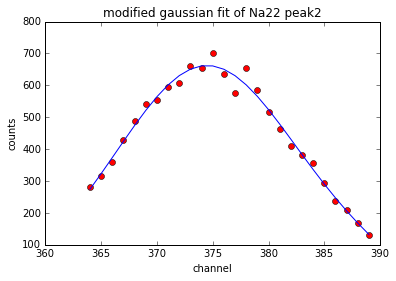

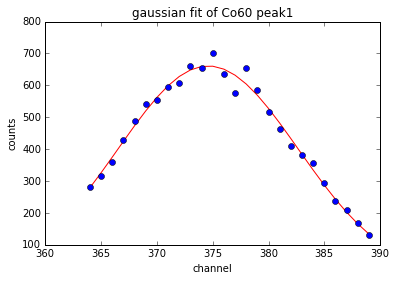

In [11]:
arr=genfromtxt("na22 peak2 .txt")
arr=arr.astype(int)
x = arr[:, 0]
y = arr[:, 1]
print 'total channel number is:',len(x)
mean= sum(x*y)/sum(y)
print 'the mean value is:',mean
std=(sum(y*(x-mean)**2)/sum(y))**0.5
print 'the standard deviation is:',std

a=amax(y)
print 'the highest observation:',a

para, unc = curve_fit(G, x, y, p0=[a,mean,std,-0.65,489.66,-12559],maxfev=100000000)
z=array(G(x, *para))
plt.plot(x,y,'ro')
plt.plot(x, z, 'b-', label='fit') 
plt.title('modified gaussian fit of Na22 peak2')
plt.xlabel('channel')
plt.ylabel('counts')
dNa2=len(x)
chiNa2=C(y,z)
print 'the expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc)[1]),2)
print 'standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc)[2]),2)
print 'chisquare is :',chiNa2
print para[3]
print para[4]
print para[5]
Na2=round(para[1],2)

Na2u=round(sqrt(diag(unc)[1]),2)

figure(2)
para, unc = curve_fit(g, x, y, p0=[a,mean,std],maxfev=1000000000)
z=array(g(x, *para))
plt.plot(x, z, 'r-', label='fit')
plt.plot(x,y,'bo')
plt.xlabel('channel')
plt.ylabel('counts')
plt.title('gaussian fit of Co60 peak1')
chigNa2=round(C(y,z),2)
print 'the gaussian expectation value is:',round(para[1],2),'+/-',round(sqrt(diag(unc)[1]),2)
print 'gaussian standard deviatition of gaussain is:',round(para[2],2),'+/-',round(sqrt(diag(unc)[2]),2)
print 'the gaussian chisquare is :',chigNa2
Nag2=round(para[1],2)

Nag2u=round(sqrt(diag(unc)[1]),2)

the peak channel numbers are: [ 155.06  345.08  374.35  390.68]
the uncertainty of the peak channel numbers are: [ 0.06  0.17  0.49  0.13]
the slope is: 0.286976652027 +/- 0.00023639549783
the intersect is: 8.41820817296 +/- 0.265290254557
the expectation value of channel number is: [ 155.07  345.11  374.18  390.81]
the chi-square is: 1.18
the peak channel of Cs137 is: 198.63 +/- 0.05
the expected peak channel of Cs137 is : 198.0
degree of freedoms: [23 26 12 20 21]
chisquare: [ 21.37   22.718   7.912  19.905  20.599]
[ 255.505  586.62   637.265  666.25 ]
[  81.74217765  176.76445178  191.29838433  199.61640259]
the resolution rate are: [ 0.15996199  0.15066351  0.15009328  0.14980593]
the expectation value of gaussian fit are: [ 100.79   24.43   40.76   20.49  104.5 ]


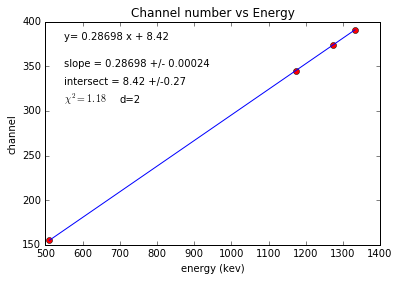

In [13]:
y=array([Na1,Co1,Na2,Co2])
s=array([ Na1u,Co1u,Na2u,Co2u])
print 'the peak channel numbers are:',y
print 'the uncertainty of the peak channel numbers are:',s
x=array([511.01,1173.24,1274.53,1332.50])
para, unc = curve_fit(L,x,y,p0=[ 0.287, 8.21],maxfev=100000000)           
Z=array(L(x,*para))
plt.plot(x,y,'ro')
plt.plot(x,Z, 'b-', label='fit')
plt.text(550, 350, 'slope = %s +/- %s' % (round(para[0],5), round(sqrt(diag(unc)[0]),5)))
plt.text(550, 330, 'intersect = %s +/-%s' % (round(para[1],2), round(sqrt(diag(unc)[1]),2)))
plt.text(550,380,'y= %s x + %s' % (round(para[0],5),round(para[1],2)))
plt.text(550,310,r'$\chi^2=1.18$')
plt.text(700,310,'d=2')
plt.ylabel('channel')
plt.xlabel('energy (kev)')
plt.title('Channel number vs Energy')


print 'the slope is:',para[0],'+/-',sqrt(diag(unc)[0])
print 'the intersect is:',para[1],'+/-',sqrt(diag(unc)[1])

print 'the expectation value of channel number is:',around(Z,2)
chigs=(around(Z,2)-y)**2/s**2
print 'the chi-square is:',round(sum(chigs),2)
print 'the peak channel of Cs137 is:',Cs,'+/-',Csu
C=L(662,*para)
print 'the expected peak channel of Cs137 is :',round(C)
D=array([dCo1,dCo2,dNa1,dNa2,dCs])-6
Chi=array([chiCo1,chiCo2,chiNa1,chiNa2,chiCs])
print 'degree of freedoms:',D 
print 'chisquare:',around(Chi,3)
v=x/2
print v
H=L(v,*para)
print H
print 'the resolution rate are:',H/x
mg=array([chigCo1,chigCo2,chigNa1,chigNa2,chigCs])
print 'the expectation value of gaussian fit are:',mg

[  0.04213678   4.63224909   8.61410065  13.41825319]
chi square is: 26.7067397086
a: 9.16947619011 +/- 11.1472087491
b: 3.15650103598e-05 +/- 8.00617964028e-06


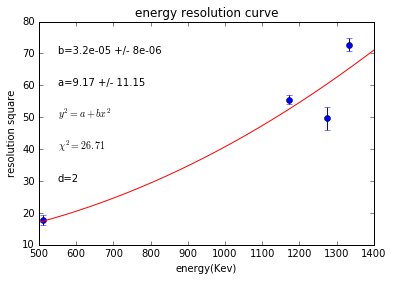

In [14]:
x=array([511.01,1173.24,1274.53,1332.50])
ss=array([4.21,7.45,7.05,8.53])
s=array([0.76,0.67,1.83,1.03])
y=ss**2
para, unc = curve_fit(S,x,y,p0=[9.16,0.00003156],maxfev=100000000)  
X=linspace(500,1400,1000)
z=array(S(x,*para))
Z=array(S(X,*para))
chigs=(z-y)**2/(4*s**2)
print chigs
print 'chi square is:',sum(chigs)
print 'a:',para[0],'+/-',sqrt(diag(unc)[0])
print 'b:',para[1],'+/-',sqrt(diag(unc)[1])
yerr=2*s
plt.errorbar(x,y,yerr,fmt='o',color='blue')
plt.plot(X,Z, 'r-')
title('energy resolution curve')
xlabel('energy(Kev)')
ylabel('resolution square')
title('energy resolution curve')
xlabel('energy(Kev)')
ylabel('resolution square')
text(550,60,'a=%s +/- %s'% (round(para[0],2),round(sqrt(diag(unc)[0]),2)))
text(550,70,'b=%s +/- %s'% (round(para[1],6),round(sqrt(diag(unc)[1]),6)))
text(550,50,r'$y^{2}= a + b x^{2}$')
text(550,40,r'$\chi^2=%s $'% (round(sum(chigs),2)))
text(550,30,'d=2')

[ 0.08784597  1.62783184  0.37361125]
chi square is: 2.08928906916
a: 7.92 +/- 2.55
b: 3.6e-05 +/- 2e-06


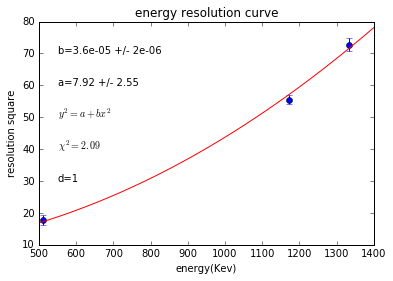

In [15]:
x=array([511.01,1173.24,1332.50])
ss=array([4.21,7.45,8.53])
s=array([0.76,0.67,1.03])
y=ss**2
para, unc = curve_fit(S,x,y,p0=[ 7.921, 0.0000036],maxfev=100000000)  
X=linspace(500,1400,1000)
z=array(S(x,*para))
Z=array(S(X,*para))
chigs=(z-y)**2/(4*s**2)
print chigs
print 'chi square is:',sum(chigs)
print 'a:',round(para[0],2),'+/-',round(sqrt(diag(unc)[0]),2)
print 'b:',round(para[1],6),'+/-',round(sqrt(diag(unc)[1]),6)
yerr=2*s
errorbar(x,y,yerr,fmt='o',color='blue')
plot(X,Z, 'r-')
title('energy resolution curve')
xlabel('energy(Kev)')
ylabel('resolution square')
text(550,60,'a=%s +/- %s'% (round(para[0],2),round(sqrt(diag(unc)[0]),2)))
text(550,70,'b=%s +/- %s'% (round(para[1],6),round(sqrt(diag(unc)[1]),6)))
text(550,50,r'$y^{2}= a + b x^{2}$')
text(550,40,r'$\chi^2=%s $'% (round(sum(chigs),2)))
text(550,30,'d=1')